#  Predicting the news popularity in multiple social media platforms

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items


In [7]:
from google.colab import files
uploaded = files.upload()


Saving News_Final.csv to News_Final.csv


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
news = pd.read_csv('News_Final.csv')

In [9]:
news

IDLink                                              Title  \
0       99248.0   Obama Lays Wreath at Arlington National Cemetery   
1       10423.0        A Look at the Health of the Chinese Economy   
2       18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3       27788.0                          Finland GDP Expands In Q4   
4       27789.0  Tourism, govt spending buoys Thai economy in J...   
...         ...                                                ...   
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93236  104793.0  Palestinian Government Uses Foreign Aid To Pay...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director business-unit...   
2      Nouriel Roubini, NYU professor and chairman at...   
3      Finland's economy expanded marginally in the t...   
4      Tourism and public spending continued to boost...   
...                                                  ...   
93234  The June employment report is viewed as a cruc...   
93235  In addition, establish stimulating economic po...   
93236  The Palestinian government spends nearly $140 ...   
93237  Palestine Youth Orchestra prepares for first U...   
93238  Goldstein, the proprietor of the TG Travel Gro...   

                                         Source      Topic  \
0                                     USA TODAY      obama   
1                                     Bloomberg    economy   
2                                     Bloomberg    economy   
3                                      RTT News    economy   
4      The Nation - Thailand&#39;s English news    economy   
...                                         ...        ...   
93234                               MarketWatch    economy   
93235                                      TASS    economy   
93236                              Daily Caller  palestine   
93237                              Ahram Online  palestine   
93238                            East Bay Times  microsoft   

               PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0      2002-04-02 00:00:00        0.000000          -0.053300        -1   
1      2008-09-20 00:00:00        0.208333          -0.156386        -1   
2      2012-01-28 00:00:00       -0.425210           0.139754        -1   
3      2015-03-01 00:06:00        0.000000           0.026064        -1   
4      2015-03-01 00:11:00        0.000000           0.141084        -1   
...                    ...             ...                ...       ...   
93234  2016-07-07 15:31:05        0.104284           0.044943        -1   
93235  2016-07-07 15:31:10        0.072194           0.000000        -1   
93236  2016-07-07 15:38:26        0.291667          -0.139754         5   
93237  2016-07-07 15:59:22        0.121534           0.092313         0   
93238  2016-07-07 16:16:11        0.000000           0.054554        -1   

       GooglePlus  LinkedIn  
0              -1        -1  
1              -1        -1  
2              -1        -1  
3              -1        -1  
4              -1        -1  
...           ...       ...  
93234           3         5  
93235           0         1  
93236           1         0  
93237           0         0  
93238           1         0  

[93239 rows x 11 columns]

In [10]:
news.describe()

IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   93239.000000    93239.000000       93239.000000  93239.000000   
mean    51560.653257       -0.005411          -0.027493    113.141336   
std     30391.078704        0.136431           0.141964    620.173233   
min         1.000000       -0.950694          -0.755433     -1.000000   
25%     24301.500000       -0.079057          -0.114574      0.000000   
50%     52275.000000        0.000000          -0.026064      5.000000   
75%     76585.500000        0.064255           0.059709     33.000000   
max    104802.000000        0.962354           0.964646  49211.000000   

         GooglePlus      LinkedIn  
count  93239.000000  93239.000000  
mean       3.888362     16.547957  
std       18.492648    154.459048  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        2.000000      4.000000  
max     1267.000000  20341.000000

In [11]:
news.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [14]:
mode_value = news['Source'].mode()[0]
news['Source'].fillna(mode_value, inplace=True)

In [15]:
news.dropna(inplace=True)

In [16]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92945 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             92945 non-null  float64
 1   Title              92945 non-null  object 
 2   Headline           92945 non-null  object 
 3   Source             92945 non-null  object 
 4   Topic              92945 non-null  object 
 5   PublishDate        92945 non-null  object 
 6   SentimentTitle     92945 non-null  float64
 7   SentimentHeadline  92945 non-null  float64
 8   Facebook           92945 non-null  int64  
 9   GooglePlus         92945 non-null  int64  
 10  LinkedIn           92945 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 8.5+ MB


In [17]:
news.shape

(92945, 11)

In [18]:
news1 = news.loc[:,['Title','Headline','Topic']]

In [19]:
news1

Title  \
0       Obama Lays Wreath at Arlington National Cemetery   
1            A Look at the Health of the Chinese Economy   
2       Nouriel Roubini: Global Economy Not Back to 2008   
3                              Finland GDP Expands In Q4   
4      Tourism, govt spending buoys Thai economy in J...   
...                                                  ...   
93234  Stocks rise as investors key in on US economy ...   
93235  Russian PM proposes to use conservative and to...   
93236  Palestinian Government Uses Foreign Aid To Pay...   
93237  Palestine Youth Orchestra prepares for first U...   
93238  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline      Topic  
0      Obama Lays Wreath at Arlington National Cemete...      obama  
1      Tim Haywood, investment director business-unit...    economy  
2      Nouriel Roubini, NYU professor and chairman at...    economy  
3      Finland's economy expanded marginally in the t...    economy  
4      Tourism and public spending continued to boost...    economy  
...                                                  ...        ...  
93234  The June employment report is viewed as a cruc...    economy  
93235  In addition, establish stimulating economic po...    economy  
93236  The Palestinian government spends nearly $140 ...  palestine  
93237  Palestine Youth Orchestra prepares for first U...  palestine  
93238  Goldstein, the proprietor of the TG Travel Gro...  microsoft  

[92945 rows x 3 columns]

In [20]:
news1['Topic'].value_counts()

economy      33889
obama        28598
microsoft    21851
palestine     8607
Name: Topic, dtype: int64

# EDA

In [ ]:
sns.countplot(news['Topic'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
def show_popularities(df):
    facebook = abs(df.groupby(['Topic'])['Facebook'].sum())
    googleplus = abs(df.groupby(['Topic'])['GooglePlus'].sum())
    linkedin = abs(df.groupby(['Topic'])['LinkedIn'].sum())

    ind = np.arange(len(topics))


    plt.figure(figsize=(14,8))
    plt.bar(ind-0.25,facebook,width=0.25,label='Facebook')
    plt.bar(ind,googleplus,width=0.25,label='GooglePlus')
    plt.bar(ind+0.25,linkedin,width=0.25,label='LinkedIn')

    plt.xticks(ind, topics)
    plt.legend()
    plt.title('Topic-wise Popularity On Each Social Media Platform', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Topics', fontdict={'size':15})
    plt.ylabel('Popularity Level', fontdict={'size':15})
    plt.show()

show_popularities(news)

<Axes: >

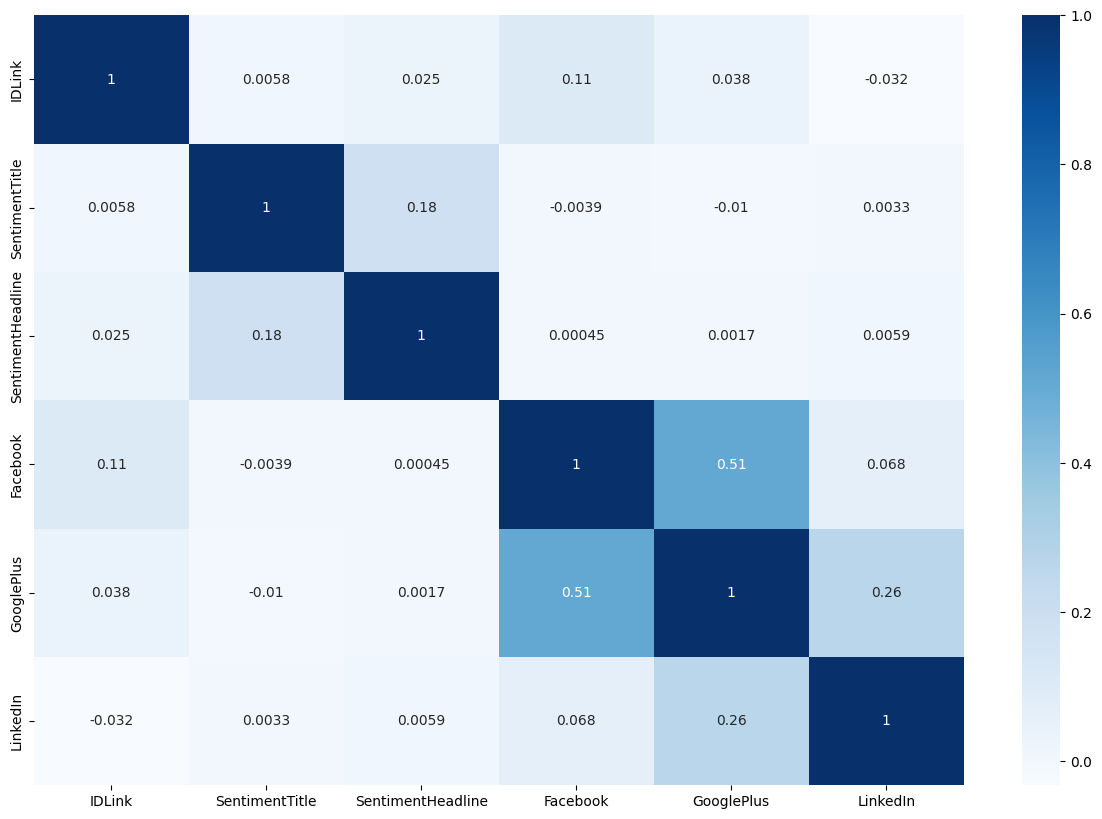

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data=news.corr(),cmap='Blues',annot=True)

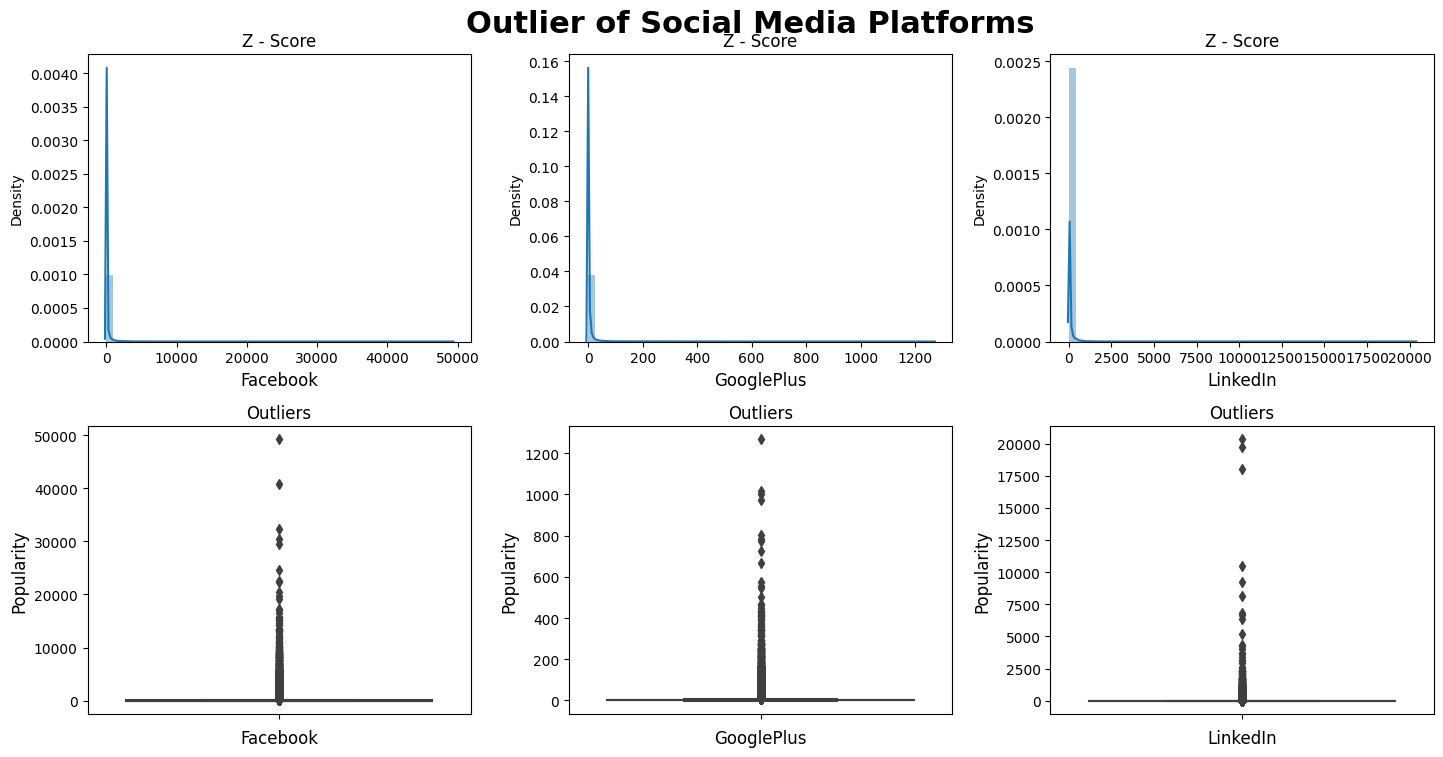

In [28]:
sources= ['Facebook', 'GooglePlus', 'LinkedIn']
topics = ['Economy','Microsoft', 'Obama', 'Palestine']
import seaborn as sns
import plotly.express as px
def show_outliers(df, three_d = False):
    fig, axes = plt.subplots(2,3,figsize=(15, 8))
    fig.tight_layout(pad=4.0)
    for source in range(len(sources)):
        sns.distplot(ax=axes[0][source],x=df[sources[source]])
        axes[0][source].set_xlabel(sources[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Density',fontdict={'fontsize': 12})

        sns.boxplot(ax=axes[1][source],y=df[sources[source]] )
        axes[1][source].set_xlabel(sources[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Popularity',fontdict={'fontsize': 12})

        axes[0][source].set_title('Z - Score')
        axes[1][source].set_title('Outliers')

        plt.suptitle('Outlier of Social Media Platforms',fontsize = 22,fontweight = 'bold')

    plt.show()

    if three_d == True:
        fig = px.scatter_3d(df, x='Facebook', y='GooglePlus', z='LinkedIn', title='Dependent Variables')
        fig.show()


show_outliers(news, True)

- The Density Plot clearly shows the data is Positively Skewed.
- We can observe outliers with the help of Box and Whisker plot.
- From the 3-D plot, we can clearly see how dependent features are distributed.
- Since, our data consists of outliers, let's start with handling them.

In [29]:
# Computing 90th percentiles and treating the outliers
def outliers_treatment(df, sources):
    for source in sources:
        # tenth_percentile = np.percentile(df[source], 10)
        ninetieth_percentile = np.percentile(df[source], 90)
        # df[source] = np.where(df[source] < tenth_percentile, tenth_percentile, df[source])
        df[source] = np.where(df[source] > ninetieth_percentile, ninetieth_percentile, df[source])

    return df

data = outliers_treatment(news, sources)

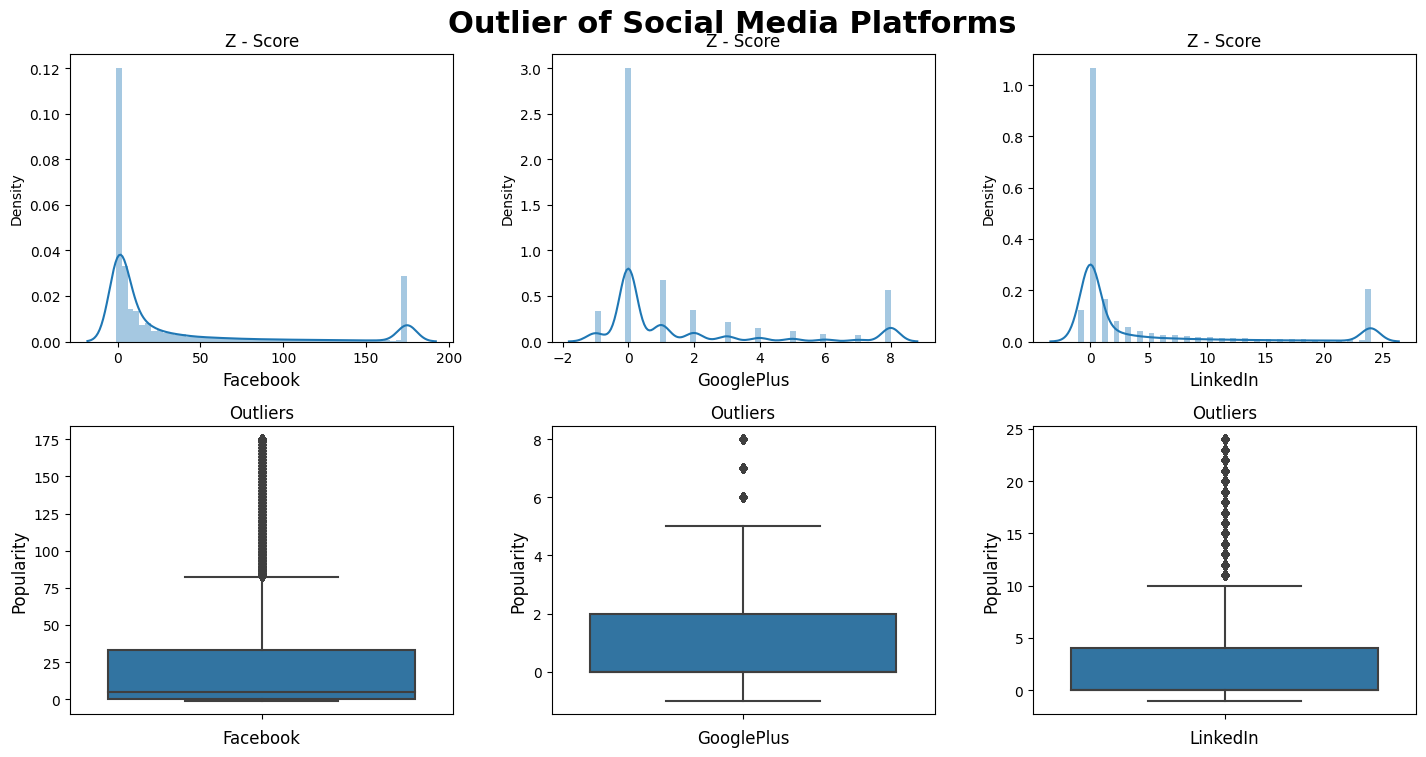

In [30]:
show_outliers(data, False)

- Density graphs display data as bi-modal rather than the previous positive skew.
- Box plot display that we have still got a few outliers but we consider working with them.
- The 3D plot shows the distribution of dependent features after outlier treatment. It look like a box, due to large number of data points, but actually its not. The data points are better visible when you zoom in the plot.

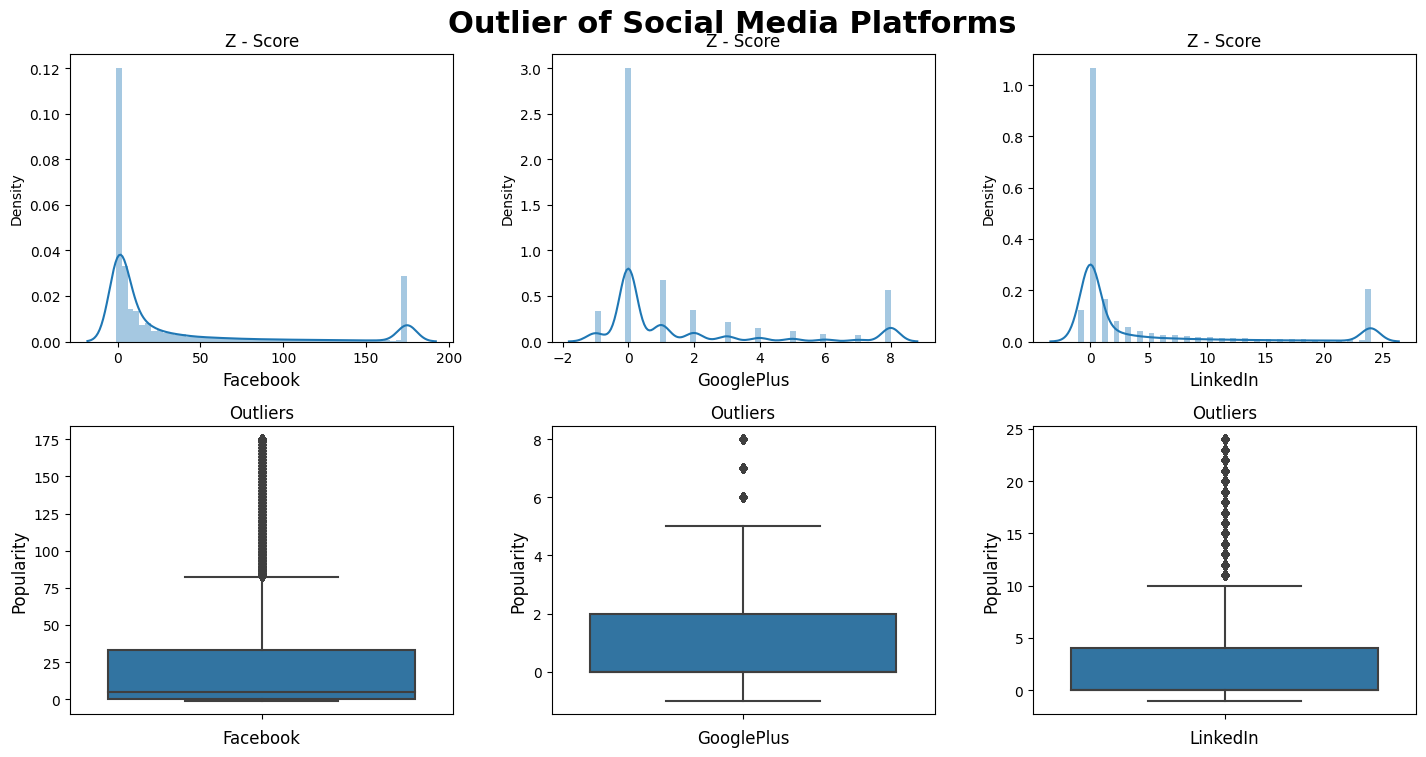

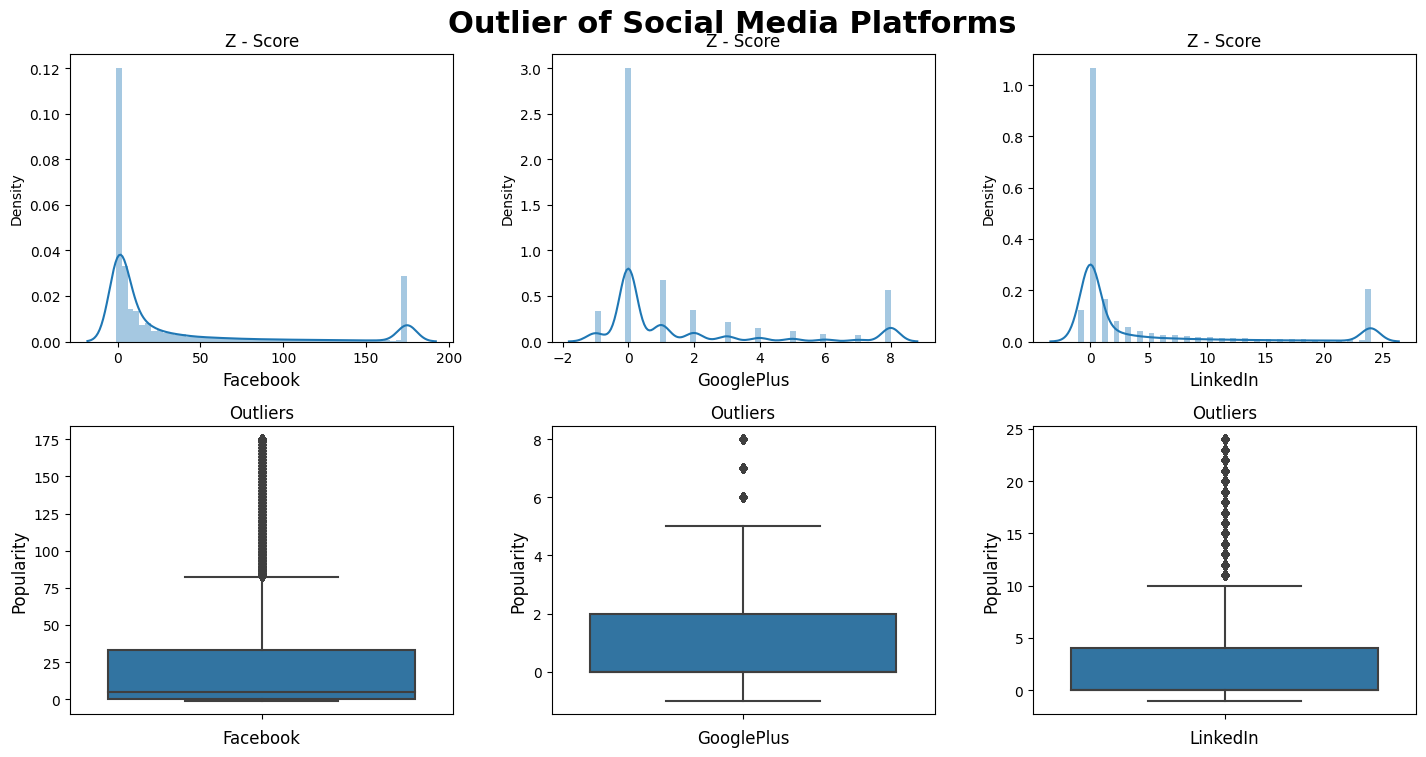

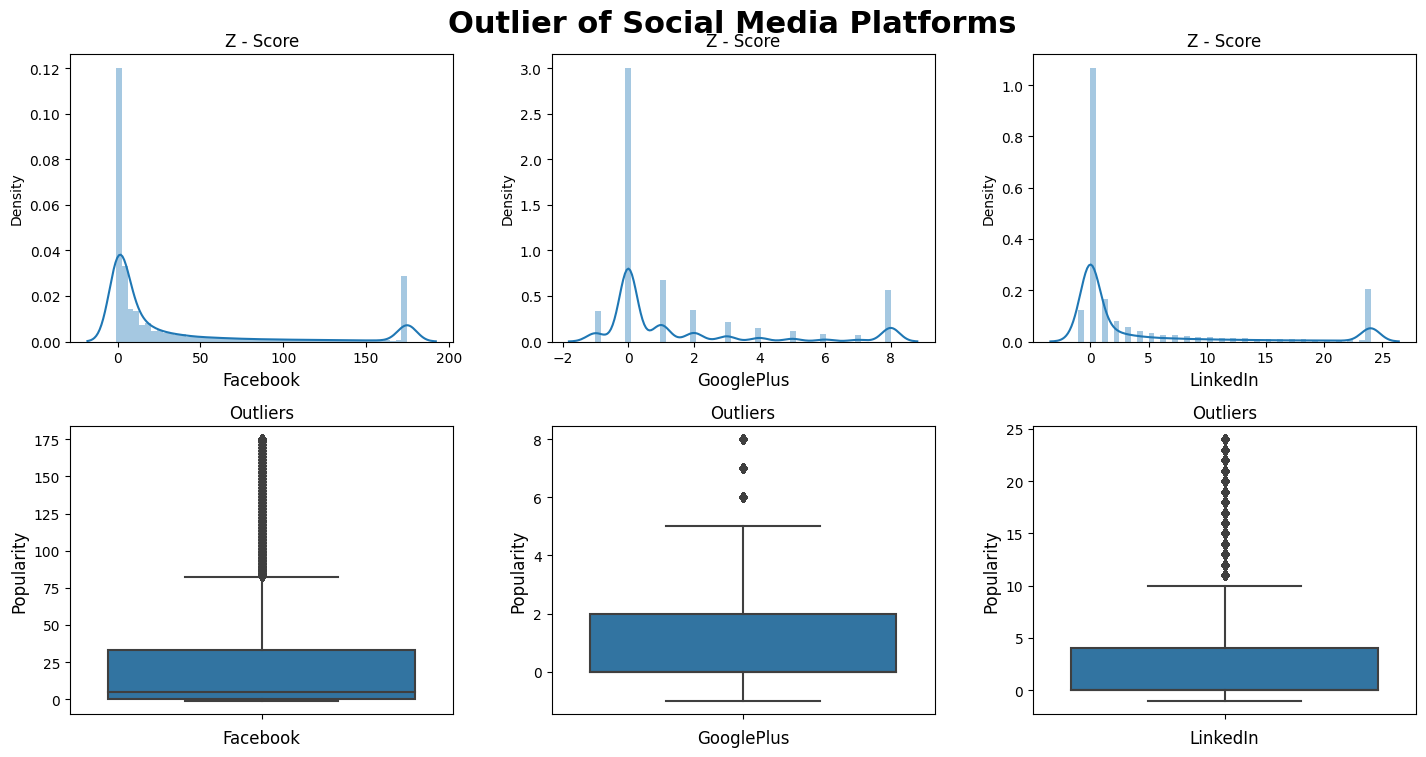

In [33]:
from sklearn.preprocessing import StandardScaler
#Standardize data
scaler = StandardScaler()

for source in sources:
    master = news[source].apply(lambda x:x if x!=(0) else np.nan)  # We excluded level 0 because actually it's level -1, which we are not considering.
    news[f'{source}_scaled'] = scaler.fit_transform(master.values.reshape(-1,1))

    news[f'{source}_scaled'].fillna(0,inplace=True) # Reversed our first step.
    news[source].fillna(0,inplace=True)

    show_outliers(news, True)

In [34]:
# Convert 'PublishDate' column to datetime format
news['PublishDate'] = pd.to_datetime(news['PublishDate'])

# Extract the publication hour
news['PublicationHour'] = news['PublishDate'].dt.hour

# Group by publication hour and calculate the average popularity
average_popularity_by_hour = news.groupby('PublicationHour')['Facebook'].mean().reset_index()

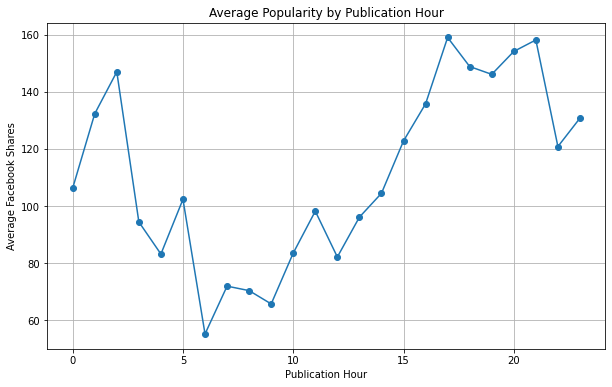

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(average_popularity_by_hour['PublicationHour'], average_popularity_by_hour['Facebook'], marker='o')
# plt.title('Average Popularity by Publication Hour')
# plt.xlabel('Publication Hour')
# plt.ylabel('Average Facebook Shares')
# plt.grid(True)
# plt.show()

In [36]:
average_popularity_by_hour_Google = news.groupby('PublicationHour')['GooglePlus'].mean().reset_index()

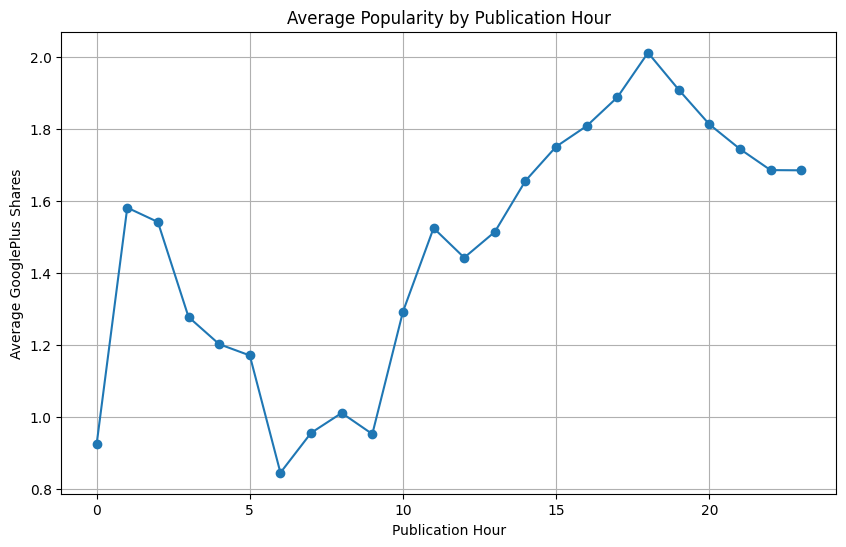

In [37]:
# plt.figure(figsize=(10, 6))
# plt.plot(average_popularity_by_hour['PublicationHour'], average_popularity_by_hour_Google['GooglePlus'], marker='o')
# plt.title('Average Popularity by Publication Hour')
# plt.xlabel('Publication Hour')
# plt.ylabel('Average GooglePlus Shares')
# plt.grid(True)
# plt.show()

In [38]:
average_popularity_by_hour_Linkedin = news.groupby('PublicationHour')['LinkedIn'].mean().reset_index()

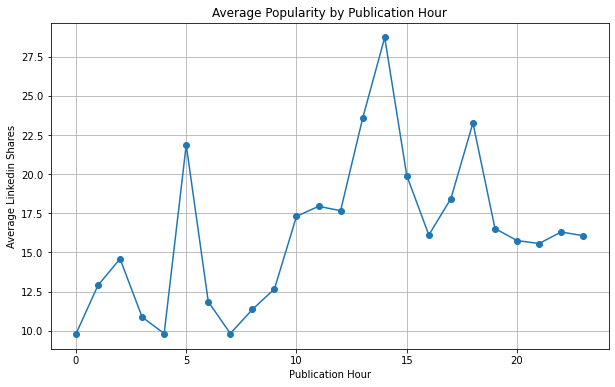

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(average_popularity_by_hour['PublicationHour'], average_popularity_by_hour_Linkedin['LinkedIn'], marker='o')
plt.title('Average Popularity by Publication Hour')
plt.xlabel('Publication Hour')
plt.ylabel('Average Linkedin Shares')
plt.grid(True)
plt.show()

In [39]:
# Convert 'PublishDate' column to datetime format
news['PublishDate'] = pd.to_datetime(news['PublishDate'])

# Extract the publication weekday (0 = Monday, 6 = Sunday)
news['PublicationWeekday'] = news['PublishDate'].dt.weekday

# Map numerical weekday to actual weekday names
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
news['PublicationWeekday'] = news['PublicationWeekday'].map(lambda x: weekday_names[x])

# Group by publication weekday and calculate the average popularity
average_popularity_by_weekday = news.groupby('PublicationWeekday')['Facebook'].mean().reset_index()

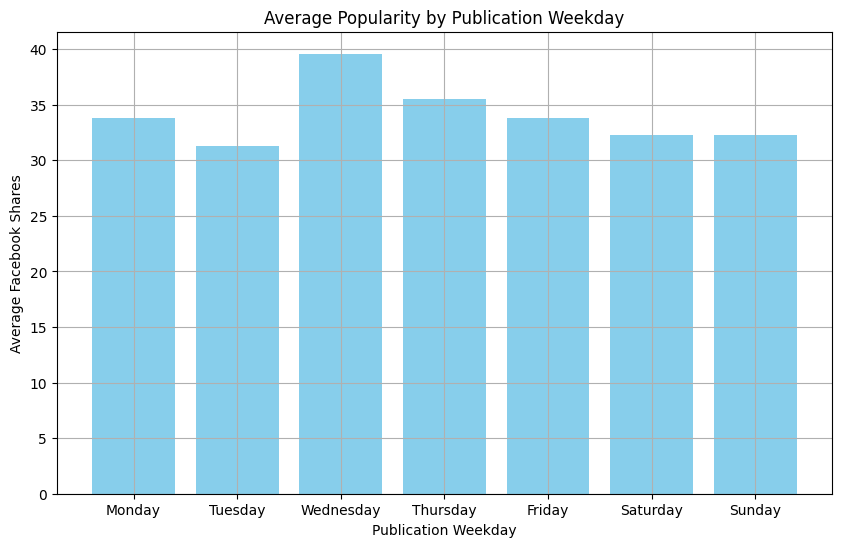

In [40]:
# Define the order of weekdays for plotting
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the average popularity by publication weekday
plt.figure(figsize=(10, 6))
plt.bar(average_popularity_by_weekday['PublicationWeekday'], average_popularity_by_weekday['Facebook'], color='skyblue')
plt.title('Average Popularity by Publication Weekday')
plt.xlabel('Publication Weekday')
plt.ylabel('Average Facebook Shares')
plt.xticks(average_popularity_by_weekday['PublicationWeekday'], labels=weekday_order)
plt.grid(True)
plt.show()

In [41]:
# Group by publication weekday and calculate the average popularity
average_popularity_by_weekday_Google = news.groupby('PublicationWeekday')['GooglePlus'].mean().reset_index()

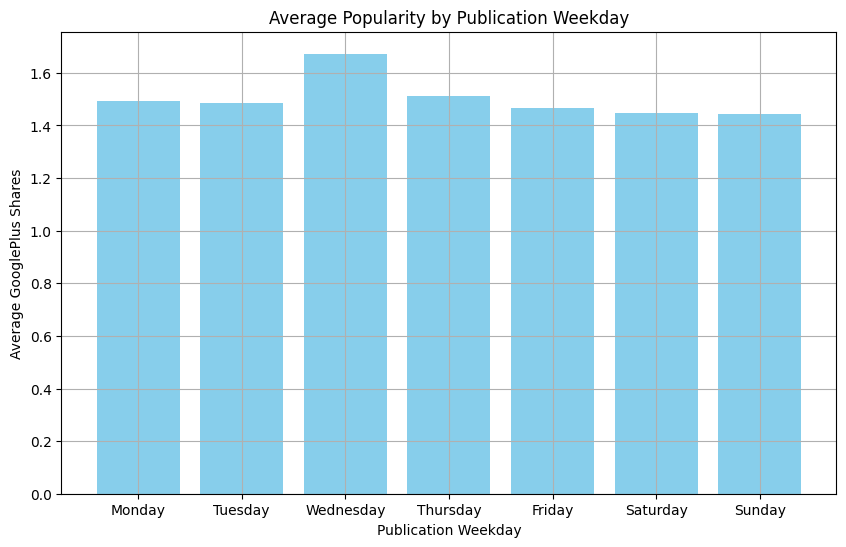

In [42]:
# Plot the average popularity by publication weekday
plt.figure(figsize=(10, 6))
plt.bar(average_popularity_by_weekday['PublicationWeekday'], average_popularity_by_weekday_Google['GooglePlus'], color='skyblue')
plt.title('Average Popularity by Publication Weekday')
plt.xlabel('Publication Weekday')
plt.ylabel('Average GooglePlus Shares')
plt.xticks(average_popularity_by_weekday['PublicationWeekday'], labels=weekday_order)  # Set the correct order
plt.grid(True)
plt.show()

In [43]:
# Group by publication weekday and calculate the average popularity
average_popularity_by_weekday_Linkedin = news.groupby('PublicationWeekday')['LinkedIn'].mean().reset_index()

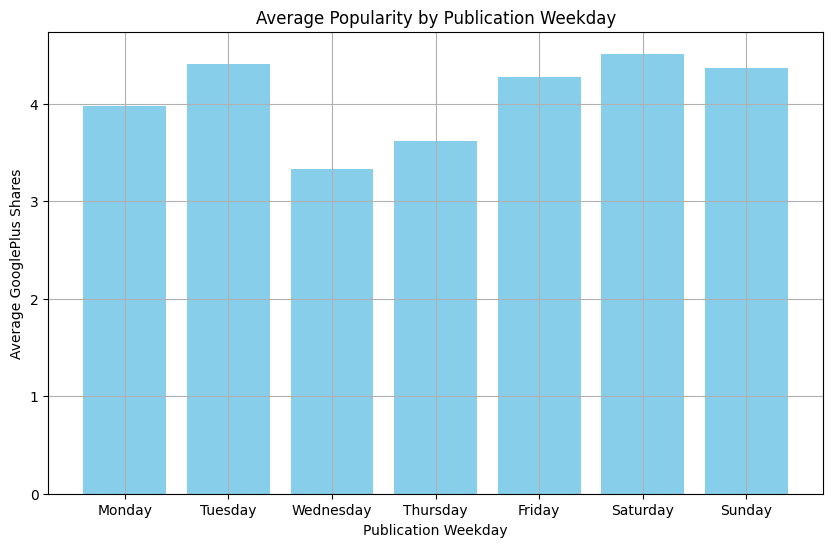

In [44]:
# Plot the average popularity by publication weekday
plt.figure(figsize=(10, 6))
plt.bar(average_popularity_by_weekday['PublicationWeekday'], average_popularity_by_weekday_Linkedin['LinkedIn'], color='skyblue')
plt.title('Average Popularity by Publication Weekday')
plt.xlabel('Publication Weekday')
plt.ylabel('Average GooglePlus Shares')
plt.xticks(average_popularity_by_weekday['PublicationWeekday'], labels=weekday_order)  # Set the correct order
plt.grid(True)
plt.show()

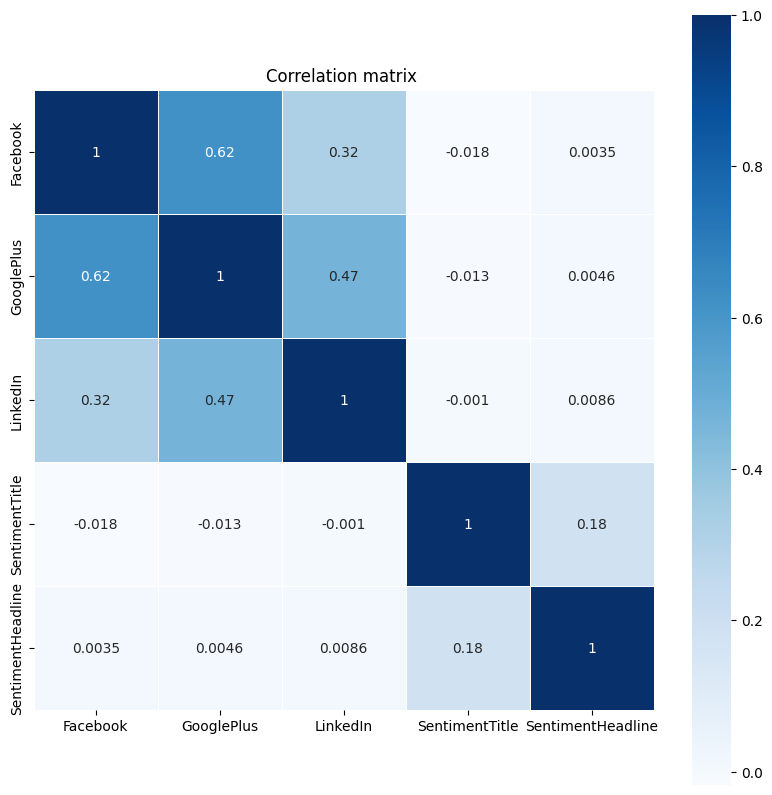

In [45]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(news[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [47]:
import nltk

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Preprocessing with NLTK

In [49]:
# Initialize NLTK lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
nltk_stopwords = nltk.corpus.stopwords.words('english')

def preprocess_text_with_nltk(text):
    text_lower = text.lower()
    tokens = nltk.word_tokenize(text_lower)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in nltk_stopwords]
    lemmas_string = ' '.join(lemmatized_tokens)
    return lemmas_string

In [50]:
news["newTitle"] = news["Title"].apply(preprocess_text_with_nltk)

In [51]:
news["newHeadline"] = news["Headline"].apply(preprocess_text_with_nltk)

In [52]:
news.head(4)

IDLink                                             Title  \
0  99248.0  Obama Lays Wreath at Arlington National Cemetery   
1  10423.0       A Look at the Health of the Chinese Economy   
2  18828.0  Nouriel Roubini: Global Economy Not Back to 2008   
3  27788.0                         Finland GDP Expands In Q4   

                                            Headline     Source    Topic  \
0  Obama Lays Wreath at Arlington National Cemete...  USA TODAY    obama   
1  Tim Haywood, investment director business-unit...  Bloomberg  economy   
2  Nouriel Roubini, NYU professor and chairman at...  Bloomberg  economy   
3  Finland's economy expanded marginally in the t...   RTT News  economy   

          PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0 2002-04-02 00:00:00        0.000000          -0.053300      -1.0   
1 2008-09-20 00:00:00        0.208333          -0.156386      -1.0   
2 2012-01-28 00:00:00       -0.425210           0.139754      -1.0   
3 2015-03-01 00:06:00        0.000000           0.026064      -1.0   

   GooglePlus  LinkedIn  Facebook_scaled  GooglePlus_scaled  LinkedIn_scaled  \
0        -1.0      -1.0        -0.695019          -1.360468        -1.050568   
1        -1.0      -1.0        -0.695019          -1.360468        -1.050568   
2        -1.0      -1.0        -0.695019          -1.360468        -1.050568   
3        -1.0      -1.0        -0.695019          -1.360468        -1.050568   

   PublicationHour PublicationWeekday  \
0                0            Tuesday   
1                0           Saturday   
2                0           Saturday   
3                0             Sunday   

                                       newTitle  \
0  obama lay wreath arlington national cemetery   
1                   look health chinese economy   
2           nouriel roubini global economy back   
3                           finland gdp expands   

                                         newHeadline  
0  obama lay wreath arlington national cemetery p...  
1  tim haywood investment director head fixed inc...  
2  nouriel roubini nyu professor chairman roubini...  
3  finland economy expanded marginally three mont...

Classifying the Sentiment Values for better analysis

In [53]:
def categorize_sentiment_with_threshold(score, positive_threshold=0.1, negative_threshold=-0.1):
    if score > positive_threshold:
        return 'positive'
    elif negative_threshold <= score <= positive_threshold:
        return 'neutral'
    else:
        return 'negative'

In [54]:
news['LabeledSentimentTitle'] = news['SentimentTitle'].apply(categorize_sentiment_with_threshold)
news['LabeledSentimentHeadline'] = news['SentimentHeadline'].apply(categorize_sentiment_with_threshold)

In [55]:
news.head()

IDLink                                              Title  \
0  99248.0   Obama Lays Wreath at Arlington National Cemetery   
1  10423.0        A Look at the Health of the Chinese Economy   
2  18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3  27788.0                          Finland GDP Expands In Q4   
4  27789.0  Tourism, govt spending buoys Thai economy in J...   

                                            Headline  \
0  Obama Lays Wreath at Arlington National Cemete...   
1  Tim Haywood, investment director business-unit...   
2  Nouriel Roubini, NYU professor and chairman at...   
3  Finland's economy expanded marginally in the t...   
4  Tourism and public spending continued to boost...   

                                     Source    Topic         PublishDate  \
0                                 USA TODAY    obama 2002-04-02 00:00:00   
1                                 Bloomberg  economy 2008-09-20 00:00:00   
2                                 Bloomberg  economy 2012-01-28 00:00:00   
3                                  RTT News  economy 2015-03-01 00:06:00   
4  The Nation - Thailand&#39;s English news  economy 2015-03-01 00:11:00   

   SentimentTitle  SentimentHeadline  Facebook  GooglePlus  LinkedIn  \
0        0.000000          -0.053300      -1.0        -1.0      -1.0   
1        0.208333          -0.156386      -1.0        -1.0      -1.0   
2       -0.425210           0.139754      -1.0        -1.0      -1.0   
3        0.000000           0.026064      -1.0        -1.0      -1.0   
4        0.000000           0.141084      -1.0        -1.0      -1.0   

   Facebook_scaled  GooglePlus_scaled  LinkedIn_scaled  PublicationHour  \
0        -0.695019          -1.360468        -1.050568                0   
1        -0.695019          -1.360468        -1.050568                0   
2        -0.695019          -1.360468        -1.050568                0   
3        -0.695019          -1.360468        -1.050568                0   
4        -0.695019          -1.360468        -1.050568                0   

  PublicationWeekday                                         newTitle  \
0            Tuesday     obama lay wreath arlington national cemetery   
1           Saturday                      look health chinese economy   
2           Saturday              nouriel roubini global economy back   
3             Sunday                              finland gdp expands   
4             Sunday  tourism govt spending buoy thai economy january   

                                         newHeadline LabeledSentimentTitle  \
0  obama lay wreath arlington national cemetery p...               neutral   
1  tim haywood investment director head fixed inc...              positive   
2  nouriel roubini nyu professor chairman roubini...              negative   
3  finland economy expanded marginally three mont...               neutral   
4  tourism public spending continued boost econom...               neutral   

  LabeledSentimentHeadline  
0                  neutral  
1                 negative  
2                 positive  
3                  neutral  
4                 positive

In [56]:
news['LabeledSentimentTitle'].value_counts()

neutral     58205
negative    18530
positive    16210
Name: LabeledSentimentTitle, dtype: int64

In [57]:
# Prepare the news for SentimentTitle classification
X_title = news['newTitle']
y_title = news['LabeledSentimentTitle']

# Prepare the news for SentimentHeadline classification
X_headline = news['newHeadline']
y_headline = news['LabeledSentimentHeadline']

In [58]:
# Split the data for SentimentTitle classification into training and testing sets
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title, y_title, test_size=0.2, random_state=42)

# Split the data for SentimentHeadline classification into training and testing sets
X_train_headline, X_test_headline, y_train_headline, y_test_headline = train_test_split(X_headline, y_headline, test_size=0.2, random_state=42)

In [59]:
# Create separate TF-IDF vectorizers for each classification task
# Title
tfidf_vectorizer_title = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf_title = tfidf_vectorizer_title.fit_transform(X_train_title)
X_test_tfidf_title = tfidf_vectorizer_title.transform(X_test_title)

# Headline
tfidf_vectorizer_headline = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf_headline = tfidf_vectorizer_headline.fit_transform(X_train_headline)
X_test_tfidf_headline = tfidf_vectorizer_headline.transform(X_test_headline)

In [60]:
# Initialize the Logistic Regression model
clf = LogisticRegression(max_iter=1000)

# Train the model on the TF-IDF transformed training data
clf.fit(X_train_tfidf_title, y_train_title)

# Make predictions on the TF-IDF transformed test data
y_pred_clf = clf.predict(X_test_tfidf_title)

# Evaluate the model
accuracy_clf = accuracy_score(y_test_title, y_pred_clf)
print(f'Accuracy: {accuracy_clf}')

# Print classification report for more detailed metrics
report_clf = classification_report(y_test_title, y_pred_clf)
print('Classification Report:')
print(report_clf)

Accuracy: 0.7358115014255743
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.44      0.55      3706
     neutral       0.74      0.92      0.82     11638
    positive       0.72      0.42      0.53      3245

    accuracy                           0.74     18589
   macro avg       0.73      0.59      0.63     18589
weighted avg       0.74      0.74      0.71     18589



In [61]:
# Initialize the Logistic Regression model
clf = LogisticRegression(max_iter=1000)

# Train the model on the TF-IDF transformed training data
clf.fit(X_train_tfidf_headline, y_train_headline)

# Make predictions on the TF-IDF transformed test data
y_pred_clf_head = clf.predict(X_test_tfidf_headline)

# Evaluate the model
accuracy_clf_head = accuracy_score(y_test_headline, y_pred_clf_head)
print(f'Accuracy: {accuracy_clf_head}')

# Print classification report for more detailed metrics
report_clf_head = classification_report(y_test_headline, y_pred_clf_head)
print('Classification Report:')
print(report_clf_head)

Accuracy: 0.6622733874872236
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.50      0.58      5188
     neutral       0.66      0.84      0.74     10310
    positive       0.65      0.34      0.45      3091

    accuracy                           0.66     18589
   macro avg       0.66      0.56      0.59     18589
weighted avg       0.66      0.66      0.64     18589



In [62]:
# Initialize the Decision tree classifier model
dt = DecisionTreeClassifier()

# Train the model on the TF-IDF transformed training data
dt.fit(X_train_tfidf_title, y_train_title)

# Make predictions on the TF-IDF transformed test data
y_pred_dt = dt.predict(X_test_tfidf_title)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_title, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

# Print classification report for more detailed metrics
report_dt = classification_report(y_test_title, y_pred_dt)
print('Classification Report:')
print(report_dt)

Accuracy: 0.7275808273710259
Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.58      0.60      3706
     neutral       0.79      0.81      0.80     11638
    positive       0.62      0.58      0.60      3245

    accuracy                           0.73     18589
   macro avg       0.67      0.66      0.67     18589
weighted avg       0.72      0.73      0.73     18589



In [63]:
# Initialize the Decision tree classifier model
dt = DecisionTreeClassifier()

# Train the model on the TF-IDF transformed training data
dt.fit(X_train_tfidf_headline, y_train_headline)

# Make predictions on the TF-IDF transformed test data
y_pred_dt_head = dt.predict(X_test_tfidf_headline)

# Evaluate the model
accuracy_dt_head = accuracy_score(y_test_headline, y_pred_dt_head)
print(f'Accuracy: {accuracy_dt_head}')

# Print classification report for more detailed metrics
report_dt_head = classification_report(y_test_headline, y_pred_dt_head)
print('Classification Report:')
print(report_dt_head)

Accuracy: 0.5918016030986067
Classification Report:
              precision    recall  f1-score   support

    negative       0.53      0.52      0.52      5188
     neutral       0.66      0.68      0.67     10310
    positive       0.45      0.42      0.43      3091

    accuracy                           0.59     18589
   macro avg       0.55      0.54      0.54     18589
weighted avg       0.59      0.59      0.59     18589



In [64]:
rf = RandomForestClassifier()

# Train the model on the TF-IDF transformed training data
rf.fit(X_train_tfidf_title, y_train_title)

# Make predictions on the TF-IDF transformed test data
y_pred_rf = rf.predict(X_test_tfidf_title)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_title, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Print classification report for more detailed metrics
report_rf = classification_report(y_test_title, y_pred_rf)
print('Classification Report:')
print(report_rf)

Accuracy: 0.7808381300769273
Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.56      0.65      3706
     neutral       0.79      0.91      0.84     11638
    positive       0.77      0.56      0.65      3245

    accuracy                           0.78     18589
   macro avg       0.77      0.68      0.71     18589
weighted avg       0.78      0.78      0.77     18589



In [65]:
rf = RandomForestClassifier()

# Train the model on the TF-IDF transformed training data
rf.fit(X_train_tfidf_headline, y_train_headline)

# Make predictions on the TF-IDF transformed test data
y_pred_rf_head = rf.predict(X_test_tfidf_headline)

# Evaluate the model
accuracy_rf_head = accuracy_score(y_test_headline, y_pred_rf_head)
print(f'Accuracy: {accuracy_rf_head}')

# Print classification report for more detailed metrics
report_rf_head = classification_report(y_test_headline, y_pred_rf_head)
print('Classification Report:')
print(report_rf_head)

Accuracy: 0.678250578298994
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.46      0.56      5188
     neutral       0.66      0.90      0.76     10310
    positive       0.79      0.30      0.43      3091

    accuracy                           0.68     18589
   macro avg       0.73      0.55      0.59     18589
weighted avg       0.70      0.68      0.65     18589



## Word Embeddings

In [66]:
import gensim.downloader as api
from gensim.models import Word2Vec

In [67]:
# Load the pre-trained Google Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

# Get the dimension of the word embeddings
embedding_size = word2vec_model.vector_size

# Compute average word embeddings for each review
X_train_embeddings = []

for review in X_train_title:
    words = review.split()
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        X_train_embeddings.append(avg_embedding)
    else:
        # Handle the case when no embeddings are available
        X_train_embeddings.append([0.0] * embedding_size)

X_test_embeddings = []

for review in X_test_title:
    words = review.split()
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        X_test_embeddings.append(avg_embedding)
    else:
        # Handle the case when no embeddings are available
        X_test_embeddings.append([0.0] * embedding_size)

# Train Logistic Regression on average embeddings
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_embeddings, y_train_title)
y_pred = lr.predict(X_test_embeddings)

# Calculate accuracy and report
accuracy = accuracy_score(y_test_title, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Accuracy: 0.6419


In [68]:
# Get the dimension of the word embeddings
embedding_size = word2vec_model.vector_size

# Compute average word embeddings for each review
X_train_embeddings = []

for review in X_train_headline:
    words = review.split()
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        X_train_embeddings.append(avg_embedding)
    else:
        # Handle the case when no embeddings are available
        X_train_embeddings.append([0.0] * embedding_size)

X_test_embeddings = []

for review in X_test_headline:
    words = review.split()
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        X_test_embeddings.append(avg_embedding)
    else:
        # Handle the case when no embeddings are available
        X_test_embeddings.append([0.0] * embedding_size)

# Train Logistic Regression on average embeddings
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_embeddings, y_train_headline)
y_pred = lr.predict(X_test_embeddings)

# Calculate accuracy and report
accuracy = accuracy_score(y_test_headline, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5780


In [69]:
# Load pre-trained GloVe models with different dimensions
glove_50d = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [76]:
# Compute average word embeddings for each review
def compute_avg_embedding(review, model):
    words = review.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        return avg_embedding
    else:
        return [0.0] * model.vector_size

X_train_embeddings_50d = [compute_avg_embedding(review, glove_50d) for review in X_train_title]
X_test_embeddings_50d = [compute_avg_embedding(review, glove_50d) for review in X_test_title]


# Train Logistic Regression on average embeddings and report accuracy
def train_and_report_accuracy(X_train_embeddings, X_test_embeddings):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train_embeddings, y_train_title)
    y_pred = lr.predict(X_test_embeddings)
    accuracy = accuracy_score(y_test_title, y_pred)
    return accuracy

accuracy_50d = train_and_report_accuracy(X_train_embeddings_50d, X_test_embeddings_50d)

print(f"Accuracy (50D): {accuracy_50d:.4f}")


Accuracy (50D): 0.6295


In [71]:
# Compute average word embeddings for each review
def compute_avg_embedding(review, model):
    words = review.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        avg_embedding = sum(embeddings) / len(embeddings)
        return avg_embedding
    else:
        return [0.0] * model.vector_size

X_train_embeddings_50d = [compute_avg_embedding(review, glove_50d) for review in X_train_headline]
X_test_embeddings_50d = [compute_avg_embedding(review, glove_50d) for review in X_test_headline]


# Train Logistic Regression on average embeddings and report accuracy
def train_and_report_accuracy(X_train_embeddings, X_test_embeddings):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train_embeddings, y_train_headline)
    y_pred = lr.predict(X_test_embeddings)
    accuracy = accuracy_score(y_test_headline, y_pred)
    return accuracy

accuracy_50d = train_and_report_accuracy(X_train_embeddings_50d, X_test_embeddings_50d)


print(f"Accuracy (50D): {accuracy_50d:.4f}")


Accuracy (50D): 0.5597


## Deep Learning Models

In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout,SimpleRNN
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [73]:
# Define parameters for the RNN model
vocab_size = 10000
max_sequence_length = 100
embedding_dim = 100
num_epochs = 5

# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_title)
sequences = tokenizer.texts_to_sequences(X_train_title)

# Pad sequences to ensure they have the same length
X_train_padded = pad_sequences(sequences, maxlen=max_sequence_length, truncating='post', padding='post')

# Encode target labels using one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_title)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)

## SIMPLE RNN

In [74]:
# Create the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_title)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_title)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 222s - loss: 0.9250 - accuracy: 0.6263 - val_loss: 0.9358 - val_accuracy: 0.6263 - 222s/epoch - 119ms/step
Epoch 2/5
1859/1859 - 155s - loss: 0.9226 - accuracy: 0.6263 - val_loss: 0.9193 - val_accuracy: 0.6263 - 155s/epoch - 84ms/step
Epoch 3/5
1859/1859 - 155s - loss: 0.9223 - accuracy: 0.6263 - val_loss: 0.9255 - val_accuracy: 0.6263 - 155s/epoch - 83ms/step
Epoch 4/5
1859/1859 - 171s - loss: 0.9223 - accuracy: 0.6263 - val_loss: 0.9206 - val_accuracy: 0.6263 - 171s/epoch - 92ms/step
Epoch 5/5
1859/1859 - 150s - loss: 0.9220 - accuracy: 0.6263 - val_loss: 0.9217 - val_accuracy: 0.6263 - 150s/epoch - 81ms/step
581/581 [==============================] - 12s 21ms/step
Accuracy: 0.6260691806982625


In [75]:
# Create the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_headline)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_headline)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 161s - loss: 0.9264 - accuracy: 0.6256 - val_loss: 0.9206 - val_accuracy: 0.6263 - 161s/epoch - 87ms/step
Epoch 2/5
1859/1859 - 153s - loss: 0.9225 - accuracy: 0.6263 - val_loss: 0.9211 - val_accuracy: 0.6263 - 153s/epoch - 82ms/step
Epoch 3/5
1859/1859 - 154s - loss: 0.9223 - accuracy: 0.6263 - val_loss: 0.9217 - val_accuracy: 0.6263 - 154s/epoch - 83ms/step
Epoch 4/5
1859/1859 - 154s - loss: 0.9217 - accuracy: 0.6263 - val_loss: 0.9231 - val_accuracy: 0.6263 - 154s/epoch - 83ms/step
Epoch 5/5
1859/1859 - 152s - loss: 0.9227 - accuracy: 0.6260 - val_loss: 0.9223 - val_accuracy: 0.6263 - 152s/epoch - 82ms/step
581/581 [==============================] - 11s 18ms/step
Accuracy: 0.5546290817149927


## LSTM

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_title)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_title)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 317s - loss: 0.9213 - accuracy: 0.6263 - val_loss: 0.9197 - val_accuracy: 0.6263 - 317s/epoch - 171ms/step
Epoch 2/5
1859/1859 - 328s - loss: 0.9198 - accuracy: 0.6263 - val_loss: 0.9207 - val_accuracy: 0.6263 - 328s/epoch - 176ms/step
Epoch 3/5
1859/1859 - 377s - loss: 0.9196 - accuracy: 0.6263 - val_loss: 0.9206 - val_accuracy: 0.6263 - 377s/epoch - 203ms/step
Epoch 4/5


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_headline)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_headline)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 334s - loss: 0.9910 - accuracy: 0.5457 - val_loss: 0.9903 - val_accuracy: 0.5466 - 334s/epoch - 180ms/step
Epoch 2/5
1859/1859 - 320s - loss: 0.9898 - accuracy: 0.5461 - val_loss: 0.9865 - val_accuracy: 0.5466 - 320s/epoch - 172ms/step
Epoch 3/5
1859/1859 - 330s - loss: 0.9895 - accuracy: 0.5461 - val_loss: 0.9865 - val_accuracy: 0.5466 - 330s/epoch - 178ms/step
Epoch 4/5
1859/1859 - 336s - loss: 0.9894 - accuracy: 0.5461 - val_loss: 0.9856 - val_accuracy: 0.5466 - 336s/epoch - 181ms/step
Epoch 5/5
1859/1859 - 340s - loss: 0.9893 - accuracy: 0.5461 - val_loss: 0.9859 - val_accuracy: 0.5466 - 340s/epoch - 183ms/step
581/581 [==============================] - 43s 70ms/step
Accuracy: 0.5546290817149927


## BILSTM

In [ ]:
# Create the BiLstm model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_title)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_title)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 530s - loss: 0.7060 - accuracy: 0.7148 - val_loss: 0.6147 - val_accuracy: 0.7505 - 530s/epoch - 285ms/step
Epoch 2/5
1859/1859 - 521s - loss: 0.5477 - accuracy: 0.7834 - val_loss: 0.6003 - val_accuracy: 0.7585 - 521s/epoch - 281ms/step
Epoch 3/5
1859/1859 - 562s - loss: 0.4605 - accuracy: 0.8192 - val_loss: 0.6414 - val_accuracy: 0.7528 - 562s/epoch - 302ms/step
Epoch 4/5
1859/1859 - 572s - loss: 0.3915 - accuracy: 0.8465 - val_loss: 0.6849 - val_accuracy: 0.7584 - 572s/epoch - 308ms/step
Epoch 5/5
1859/1859 - 515s - loss: 0.3349 - accuracy: 0.8687 - val_loss: 0.7674 - val_accuracy: 0.7538 - 515s/epoch - 277ms/step
581/581 [==============================] - 53s 86ms/step
Accuracy: 0.7585130991446555


In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_headline)
sequences = tokenizer.texts_to_sequences(X_train_headline)

# Pad sequences to ensure they have the same length
X_train_padded = pad_sequences(sequences, maxlen=max_sequence_length, truncating='post', padding='post')

# Encode target labels using one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_headline)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)

In [ ]:
# Create the BiLstm model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_padded, y_train_one_hot, epochs=num_epochs, validation_split=0.2, batch_size=32, verbose=2)

# Evaluate the model
sequences_test = tokenizer.texts_to_sequences(X_test_headline)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, truncating='post', padding='post')
y_pred = model.predict(X_test_padded)

# Convert one-hot encoded predictions to labels
y_pred_labels_encoded = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels_encoded)

# Encode test labels and convert to one-hot encoding
y_test_encoded = label_encoder.transform(y_test_headline)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Evaluate accuracy
accuracy = np.mean(y_pred_labels_encoded == y_test_encoded)
print(f'Accuracy: {accuracy}')

Epoch 1/5
1859/1859 - 561s - loss: 0.8086 - accuracy: 0.6329 - val_loss: 0.7350 - val_accuracy: 0.6679 - 561s/epoch - 302ms/step
Epoch 2/5
1859/1859 - 537s - loss: 0.6569 - accuracy: 0.7172 - val_loss: 0.7214 - val_accuracy: 0.6832 - 537s/epoch - 289ms/step
Epoch 3/5
1859/1859 - 612s - loss: 0.5691 - accuracy: 0.7628 - val_loss: 0.7647 - val_accuracy: 0.6850 - 612s/epoch - 329ms/step
Epoch 4/5
1859/1859 - 579s - loss: 0.4829 - accuracy: 0.8051 - val_loss: 0.8110 - val_accuracy: 0.6723 - 579s/epoch - 311ms/step
Epoch 5/5
1859/1859 - 711s - loss: 0.3999 - accuracy: 0.8410 - val_loss: 0.9119 - val_accuracy: 0.6629 - 711s/epoch - 383ms/step
581/581 [==============================] - 50s 81ms/step
Accuracy: 0.6684598418419495


**Conclusion:**

In our pursuit of predicting news article popularity on social media platforms, we employed a variety of models and techniques. Here's a concise summary of our key findings:

- **Machine Learning Models:** Logistic Regression and Random Forest models performed well, with accuracy rates of approximately 73.58% and 78.08% for titles, respectively.

- **Word Embedding:** Word2Vec and GloVe embeddings helped capture textual nuances and yielded accuracy rates around 64.19% and 62.95% for titles, respectively.

- **Deep Learning Models:** Bidirectional LSTM (BiLSTM) was the standout deep learning model, achieving an impressive 75.85% accuracy for titles.

Our results provide valuable insights for content creators and publishers, allowing them to optimize their strategies for social media engagement. Further improvements could be explored by refining deep learning models and text preprocessing techniques.

To improve the results of your predictive model for news popularity in multiple social media platforms, you can consider implementing the following strategies:

Feature Engineering:

Additional Features: Explore the possibility of incorporating more relevant features, such as user engagement history, author credibility, or the source of the news article. These can provide valuable context for predicting popularity.
Temporal Features: Utilize more sophisticated temporal features, such as time series analysis, to capture time-dependent trends and seasonality in news popularity.
Text Preprocessing:

Advanced Text Embeddings: Experiment with more advanced text embeddings like BERT, GPT, or fastText, which can capture intricate semantic relationships in text data better than traditional embeddings like Word2Vec or GloVe.
Model Selection and Tuning:

Ensemble Models: Combine multiple models using ensemble techniques like stacking or bagging to leverage the strengths of different algorithms.
Hyperparameter Tuning: Fine-tune the hyperparameters of your models using techniques like grid search or random search to find the optimal configurations.
Data Augmentation:

Augment your dataset by generating synthetic data points or applying techniques like oversampling or SMOTE to balance classes if you have class imbalance issues.
Deep Learning Architectures:

Experiment with more complex deep learning architectures like Transformers or attention-based models, which have shown impressive performance in natural language understanding tasks.